# Using Clustering to build mood based playlists

In [1]:
# Required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

### Collecting data
 See https://colab.research.google.com/drive/1-c-F9BTy2W2PkuArX0S4Rbp_kNhwB8rI#scrollTo=zI_yPGEItOYD for notebook on importing and collecting data

In [2]:
# Import and merge data (Each call can only take 2000 songs so merge last 5 years)
# tmp1 = pd.read_csv('data/spotify_data_2020.csv')
# tmp2 = pd.read_csv('data/spotify_data_2019.csv')
# tmp3 = pd.read_csv('data/spotify_data_2018.csv')
# tmp4 = pd.read_csv('data/spotify_data_2017.csv')
# tmp5 = pd.read_csv('data/spotify_data_2016.csv')

# frames = [tmp1,tmp2,tmp3,tmp4,tmp5]

# df = pd.concat(frames).drop_duplicates().reset_index(drop=True) 

df = pd.read_json('data/SpotifyData.json')
# df = df.drop(columns=['Unnamed: 0'])
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,99,0.700,0.722,7,-3.558,0,0.0369,0.221,0.0,0.2720,0.756,90.989,140526,4
1,Ariana Grande,34+35,6Im9k8u9iIzKMrmV7BWtlF,97,0.830,0.585,0,-6.476,1,0.0940,0.237,0.0,0.2480,0.485,109.978,173711,4
2,Ariana Grande,positions,35mvY5S1H3J2QZyna3TFe0,99,0.737,0.802,0,-4.771,1,0.0878,0.468,0.0,0.0931,0.682,144.015,172325,4
3,CJ,Whoopty,5vGLcdRuSbUhD8ScwsGSdA,96,0.711,0.598,3,-7.621,0,0.1820,0.190,0.0,0.1500,0.737,140.175,123429,4
4,The Kid LAROI,WITHOUT YOU,27OeeYzk6klgBh83TSvGMA,96,0.662,0.413,0,-7.357,1,0.0299,0.213,0.0,0.1340,0.467,93.005,161385,4


In [3]:
# shape of the dataset
print("Data Frame Dimensions:")
print("Lines:\t\t{}".format(df.shape[0]))
print("Columns:\t{}".format(df.shape[1]))

# Verify no missing data
print(df.info())

Data Frame Dimensions:
Lines:		21718
Columns:	17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21718 entries, 0 to 21717
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       21718 non-null  object 
 1   track_name        21718 non-null  object 
 2   track_id          21718 non-null  object 
 3   popularity        21718 non-null  int64  
 4   danceability      21718 non-null  float64
 5   energy            21718 non-null  float64
 6   key               21718 non-null  int64  
 7   loudness          21718 non-null  float64
 8   mode              21718 non-null  int64  
 9   speechiness       21718 non-null  float64
 10  acousticness      21718 non-null  float64
 11  instrumentalness  21718 non-null  float64
 12  liveness          21718 non-null  float64
 13  valence           21718 non-null  float64
 14  tempo             21718 non-null  float64
 15  duration_ms       21718 non-null  int6

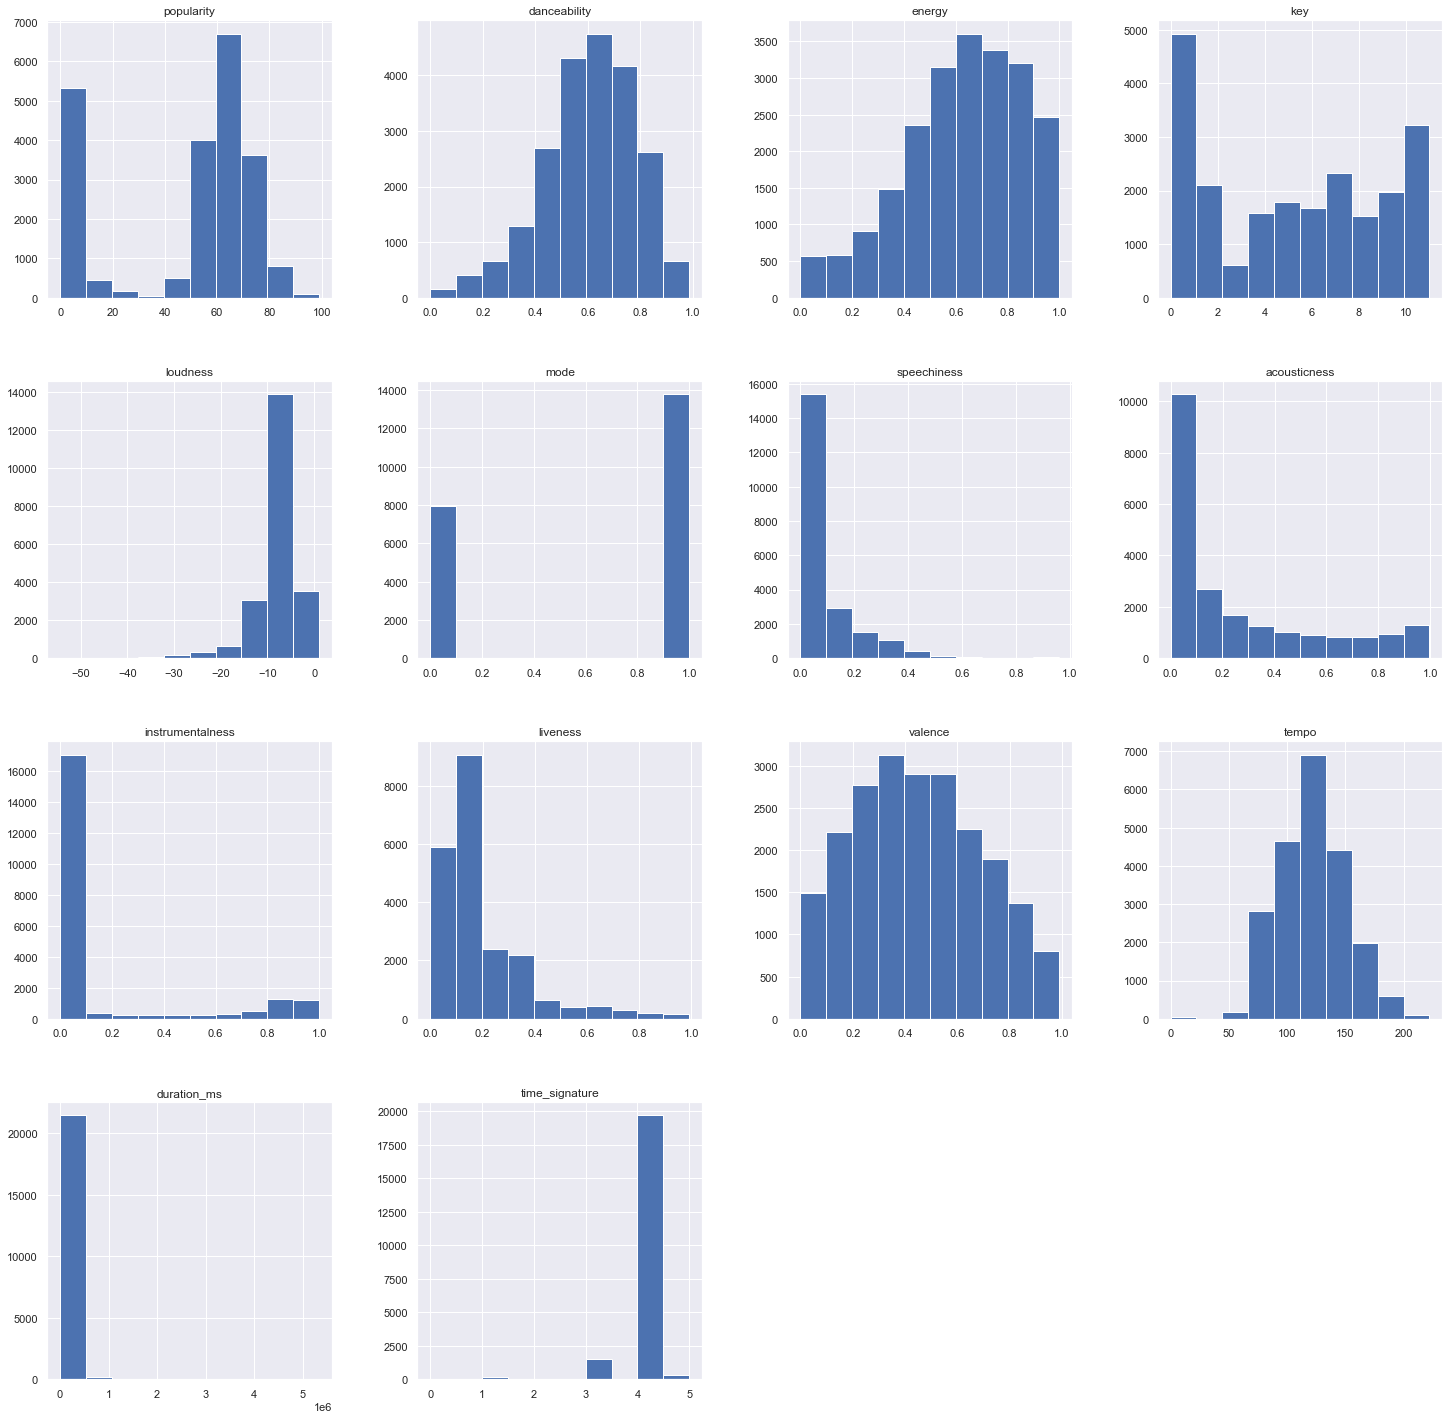

In [4]:
# Take a look at how the data is
df.hist(figsize=(25,25));

In [12]:
# statistical distribution of categorical values
df.describe(include="O")

,artist_name,track_name,track_id
count,21718,21718,21718
unique,6390,19272,21559
top,Taylor Swift,New Years Day - Original Mix,4DYObI1NwZYqfcs9fiWBEd
freq,167,30,4


In [13]:
# checking most recurrent artists
n = 10
print("Most Popular Artists")
df['artist_name'].value_counts()[:n]

Most Popular Artists


Taylor Swift         167
Drake                165
Roy Orbison          150
TandMProductionCo    146
BTS                  115
Robin Trower          96
The Weeknd            95
Mac Miller            95
David Bowie           93
One Direction         92
Name: artist_name, dtype: int64

## Building a correlation matrix to take a look at the data

Predictive correlation between different variables

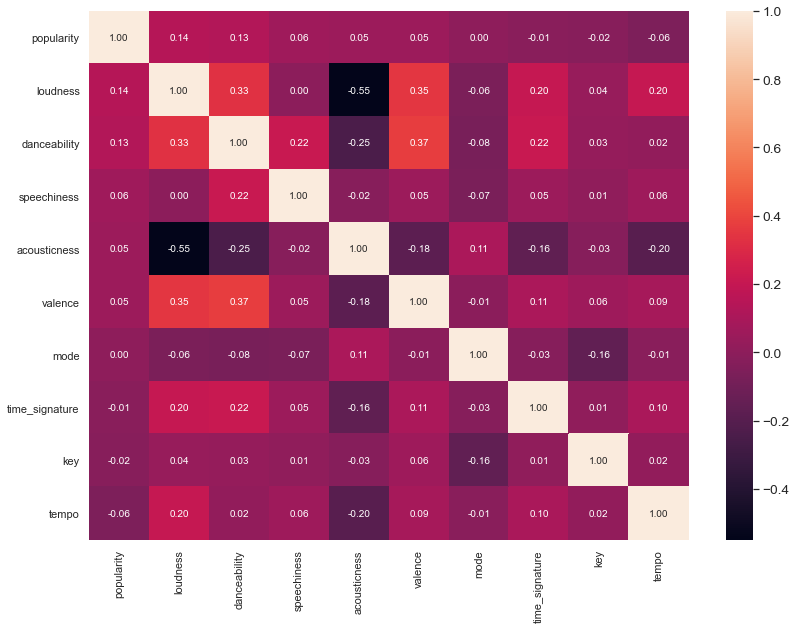

In [5]:
# creating a correlation matrix
corr = df.corr()

# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()


# TODO: Investigate data from here

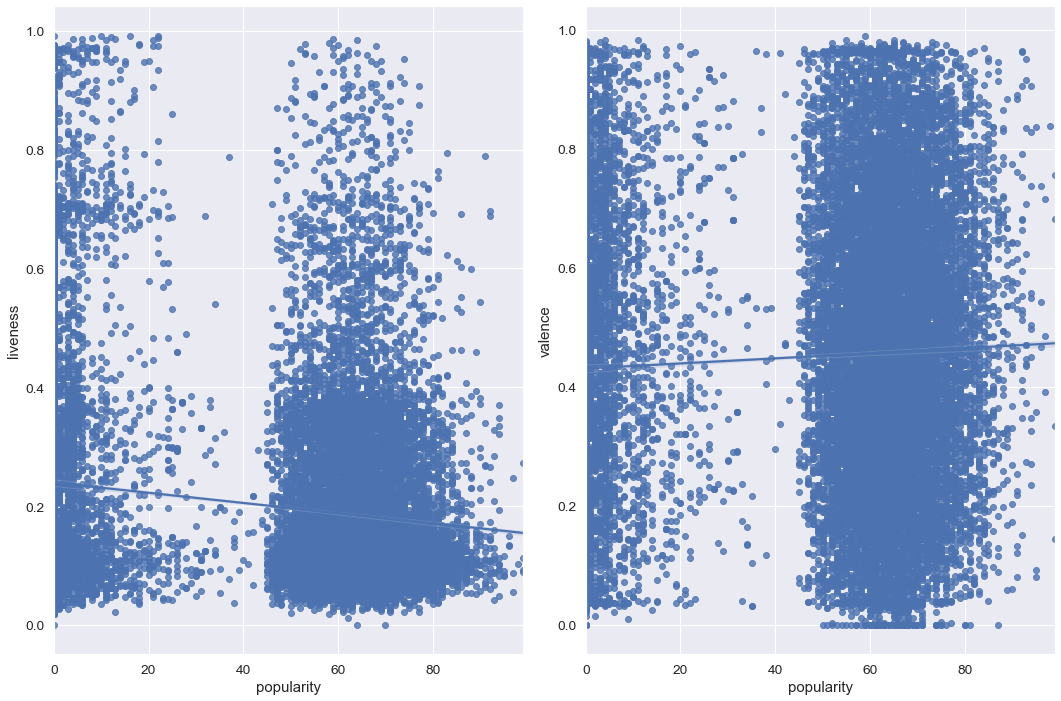

In [15]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
# sns.regplot(x=df['popularity'], y=df['liveness'], ax=ax1);
# sns.regplot(x=df['popularity'], y=df['valence'], ax=ax2);
# plt.tight_layout()

In [6]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [14]:
df.head(2)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,99,0.70,0.722,7,-3.558,0,0.0369,0.221,0.0,0.272,0.756,90.989,140526,4
1,Ariana Grande,34+35,6Im9k8u9iIzKMrmV7BWtlF,97,0.83,0.585,0,-6.476,1,0.0940,0.237,0.0,0.248,0.485,109.978,173711,4


In [15]:
# creating a copy of the dataset
df_cluster = df.copy()
df_cluster = df_cluster.iloc[:300]

# creating a dataframe without the categorical features
X = pd.DataFrame(df_cluster.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,99.0,0.700,0.722,7.0,-3.558,0.0,0.0369,0.2210,0.000000,0.2720,0.756,90.989,140526.0,4.0
1,97.0,0.830,0.585,0.0,-6.476,1.0,0.0940,0.2370,0.000000,0.2480,0.485,109.978,173711.0,4.0
2,99.0,0.737,0.802,0.0,-4.771,1.0,0.0878,0.4680,0.000000,0.0931,0.682,144.015,172325.0,4.0
3,96.0,0.711,0.598,3.0,-7.621,0.0,0.1820,0.1900,0.000000,0.1500,0.737,140.175,123429.0,4.0
4,96.0,0.662,0.413,0.0,-7.357,1.0,0.0299,0.2130,0.000000,0.1340,0.467,93.005,161385.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,78.0,0.693,0.434,4.0,-8.786,0.0,0.3850,0.2040,0.000000,0.2770,0.542,147.066,119738.0,4.0
296,85.0,0.764,0.526,11.0,-7.355,1.0,0.2120,0.0484,0.000000,0.0718,0.588,114.910,222243.0,4.0
297,80.0,0.706,0.760,8.0,-4.702,1.0,0.0369,0.0599,0.000001,0.2020,0.564,95.499,126444.0,4.0
298,92.0,0.714,0.761,5.0,-4.596,0.0,0.0427,0.1390,0.000350,0.2410,0.906,168.022,230693.0,4.0


In [16]:
cols = df_cluster.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].columns
X.columns = cols

In [24]:
X.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,99.0,0.700,0.722,7.0,-3.558,0.0,0.0369,0.221,0.0,0.2720,0.756,90.989,140526.0,4.0
1,97.0,0.830,0.585,0.0,-6.476,1.0,0.0940,0.237,0.0,0.2480,0.485,109.978,173711.0,4.0
2,99.0,0.737,0.802,0.0,-4.771,1.0,0.0878,0.468,0.0,0.0931,0.682,144.015,172325.0,4.0
3,96.0,0.711,0.598,3.0,-7.621,0.0,0.1820,0.190,0.0,0.1500,0.737,140.175,123429.0,4.0
4,96.0,0.662,0.413,0.0,-7.357,1.0,0.0299,0.213,0.0,0.1340,0.467,93.005,161385.0,4.0


In [17]:
print(X.shape)
df_cluster.head()

(300, 14)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,99,0.700,0.722,7,-3.558,0,0.0369,0.221,0.0,0.2720,0.756,90.989,140526,4
1,Ariana Grande,34+35,6Im9k8u9iIzKMrmV7BWtlF,97,0.830,0.585,0,-6.476,1,0.0940,0.237,0.0,0.2480,0.485,109.978,173711,4
2,Ariana Grande,positions,35mvY5S1H3J2QZyna3TFe0,99,0.737,0.802,0,-4.771,1,0.0878,0.468,0.0,0.0931,0.682,144.015,172325,4
3,CJ,Whoopty,5vGLcdRuSbUhD8ScwsGSdA,96,0.711,0.598,3,-7.621,0,0.1820,0.190,0.0,0.1500,0.737,140.175,123429,4
4,The Kid LAROI,WITHOUT YOU,27OeeYzk6klgBh83TSvGMA,96,0.662,0.413,0,-7.357,1,0.0299,0.213,0.0,0.1340,0.467,93.005,161385,4


In [18]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = cols

In [20]:
scaled.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.000000,0.589443,0.697009,0.636364,0.902763,0.0,0.025705,0.235688,0.0,0.349024,0.788616,0.208191,0.256002,0.75
1,0.913043,0.780059,0.518856,0.000000,0.714360,1.0,0.136065,0.252767,0.0,0.313273,0.490257,0.341398,0.367972,0.75
2,1.000000,0.643695,0.801040,0.000000,0.824445,1.0,0.124082,0.499354,0.0,0.082526,0.707145,0.580167,0.363296,0.75
3,0.869565,0.605572,0.535761,0.272727,0.640431,0.0,0.306146,0.202596,0.0,0.167287,0.767698,0.553230,0.198314,0.75
4,0.869565,0.533724,0.295189,0.000000,0.657477,1.0,0.012176,0.227148,0.0,0.143453,0.470439,0.222333,0.326383,0.75


In [21]:
scaled= scaler.fit_transform(X)

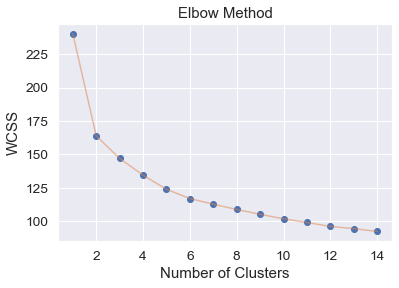

In [22]:
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [23]:
# instantiating model
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

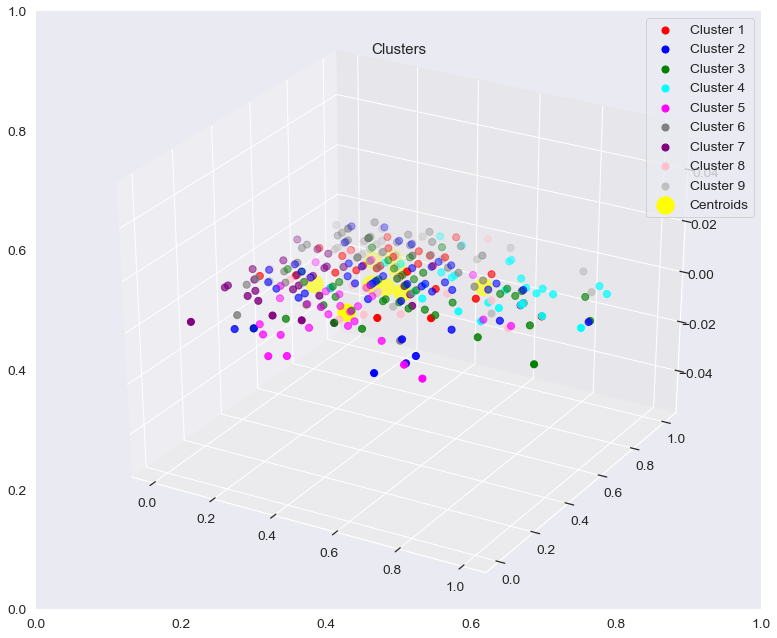

In [24]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(scaled[y_kmeans == 6,0], scaled[y_kmeans == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(scaled[y_kmeans == 7,0], scaled[y_kmeans == 7,1], s= 50, c= 'pink', label= 'Cluster 8')
plt.scatter(scaled[y_kmeans == 8,0], scaled[y_kmeans == 8,1], s= 50, c= 'silver', label= 'Cluster 9')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [33]:
# predictions 
y_kmeans

array([3, 2, 2, 3, 2, 1, 2, 3, 3, 0, 8, 2, 3, 1, 3, 3, 0, 4, 4, 1, 3, 4,
       2, 7, 1, 2, 3, 3, 4, 1, 5, 5, 2, 1, 1, 8, 8, 1, 8, 1, 4, 1, 0, 1,
       8, 5, 2, 7, 0, 5, 3, 2, 5, 1, 6, 8, 3, 4, 7, 2, 3, 2, 2, 6, 4, 1,
       2, 8, 2, 3, 7, 6, 5, 3, 4, 6, 2, 5, 5, 8, 8, 7, 0, 1, 8, 4, 5, 5,
       2, 3, 3, 6, 2, 2, 1, 2, 4, 0, 1, 4, 6, 4, 2, 5, 3, 5, 0, 6, 1, 6,
       2, 5, 7, 0, 4, 1, 0, 6, 1, 2, 1, 7, 8, 4, 1, 0, 2, 3, 7, 3, 7, 2,
       1, 1, 5, 2, 4, 4, 4, 1, 4, 2, 7, 7, 5, 7, 6, 3, 1, 5, 2, 8, 4, 0,
       7, 0, 8, 4, 0, 8, 2, 8, 5, 8, 4, 6, 5, 2, 6, 2, 8, 8, 7, 6, 0, 3,
       8, 5, 4, 6, 8, 5, 0, 5, 2, 5, 5, 3, 5, 6, 1, 0, 4, 8, 3, 7, 1, 8,
       0, 7, 2, 8, 1, 4, 1, 1, 5, 5, 2, 4, 8, 1, 8, 8, 1, 1, 7, 8, 0, 6,
       0, 3, 1, 5, 2, 2, 6, 6, 0, 1, 8, 3, 6, 8, 8, 8, 0, 1, 5, 1, 6, 6,
       4, 1, 5, 3, 0, 0, 5, 1, 0, 5, 2, 4, 0, 2, 2, 0, 5, 5, 5, 5, 5, 1,
       0, 1, 1, 0, 4, 7, 6, 2, 8, 7, 2, 6, 2, 3, 6, 1, 2, 5, 4, 6, 6, 5,
       1, 6, 6, 0, 7, 6, 8, 8, 5, 5, 0, 6, 3, 3])

In [25]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predictions as a df
print(kmeans.shape)
kmeans.head()

(300, 1)


,k_cluster
0,3
1,2
2,2
3,3
4,2


In [26]:
# concatenating the cluster column to the dataframe
df_cluster = pd.concat([df_cluster, kmeans], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head(10)

(300, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,99,0.700,0.722,7,-3.558,0,0.0369,0.22100,0.000000,0.2720,0.756,90.989,140526,4,3
1,Ariana Grande,34+35,6Im9k8u9iIzKMrmV7BWtlF,97,0.830,0.585,0,-6.476,1,0.0940,0.23700,0.000000,0.2480,0.485,109.978,173711,4,2
2,Ariana Grande,positions,35mvY5S1H3J2QZyna3TFe0,99,0.737,0.802,0,-4.771,1,0.0878,0.46800,0.000000,0.0931,0.682,144.015,172325,4,2
3,CJ,Whoopty,5vGLcdRuSbUhD8ScwsGSdA,96,0.711,0.598,3,-7.621,0,0.1820,0.19000,0.000000,0.1500,0.737,140.175,123429,4,3
4,The Kid LAROI,WITHOUT YOU,27OeeYzk6klgBh83TSvGMA,96,0.662,0.413,0,-7.357,1,0.0299,0.21300,0.000000,0.1340,0.467,93.005,161385,4,2
5,SZA,Good Days,3YJJjQPAbDT7mGpX3WtQ9A,92,0.436,0.655,1,-8.370,0,0.0583,0.49900,0.000008,0.6880,0.412,121.002,279204,4,1
6,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,99,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4,2
7,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,94,0.823,0.586,6,-6.606,0,0.2000,0.11400,0.000000,0.1930,0.347,125.971,190476,4,3
8,Billie Eilish,Therefore I Am,54bFM56PmE4YLRnqpW6Tha,97,0.889,0.340,11,-7.773,0,0.0697,0.21800,0.130000,0.0550,0.716,94.009,174321,4,3
9,Pop Smoke,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,96,0.709,0.548,10,-8.493,1,0.3530,0.65000,0.000002,0.1330,0.543,83.995,160000,4,0


In [27]:
# popularity mean by cluster
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
3    90.500000
2    86.441860
1    85.045455
4    84.862069
0    84.433333
7    84.000000
8    83.147059
5    82.150000
6    80.766667
Name: popularity, dtype: float64

In [28]:
# checking number of songs in each cluster
df_cluster['k_cluster'].value_counts()

1    44
2    43
5    40
8    34
6    30
3    30
0    30
4    29
7    20
Name: k_cluster, dtype: int64

In [30]:
# checking the songs in the cluster
df_cluster.loc[df_cluster['k_cluster'] == 1][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
5,SZA,Good Days,3YJJjQPAbDT7mGpX3WtQ9A,92,0.436,0.655,1,-8.370,0,0.0583,0.49900,0.000008,0.6880,0.412,121.002,279204,4,1
13,Bad Bunny,DÁKITI,47EiUVwUp4C9fGccaPuUCS,99,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,205090,4,1
19,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,93,0.799,0.660,1,-6.153,0,0.0790,0.25600,0.000000,0.1110,0.471,140.040,195429,4,1
24,Ritt Momney,Put Your Records On,6AGOKlMZWLCaEJGnaROtF9,92,0.399,0.491,6,-10.778,0,0.0538,0.05630,0.000890,0.1100,0.151,91.066,210463,4,1
29,Machine Gun Kelly,my ex's best friend (with blackbear),7kDUspsoYfLkWnZR7qwHZl,89,0.731,0.675,5,-5.134,0,0.0434,0.00473,0.000000,0.1410,0.298,124.939,139461,4,1
33,Shawn Mendes,Monster (Shawn Mendes & Justin Bieber),2Z8yfpFX0ZMavHkcIeHiO1,94,0.652,0.383,2,-7.076,0,0.0516,0.06760,0.000000,0.0828,0.549,145.765,178994,4,1
34,Polo G,Martin & Gina,1VLtjHwRWOVJiE5Py7JxoQ,87,0.832,0.534,1,-7.813,0,0.2530,0.34500,0.000000,0.1650,0.116,93.924,132833,4,1
37,Ariana Grande,pov,3UoULw70kMsiVXxW0L3A33,90,0.487,0.534,0,-5.664,0,0.0555,0.36000,0.000000,0.1000,0.173,131.798,201882,4,1
39,Internet Money,"Lemonade (feat. Gunna, Don Toliver & NAV)",7hxHWCCAIIxFLCzvDgnQHX,91,0.800,0.658,1,-6.142,0,0.0790,0.25000,0.000000,0.1110,0.462,140.042,195429,4,1
41,Kid Cudi,Tequila Shots,30KctD1WsHKTIYczXjip5a,86,0.712,0.556,5,-7.214,0,0.0531,0.08400,0.000050,0.5270,0.220,90.494,193293,4,1


In [31]:
# checking the songs in the cluster
df_cluster.loc[df_cluster['k_cluster'] == 2][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
1,Ariana Grande,34+35,6Im9k8u9iIzKMrmV7BWtlF,97,0.830,0.585,0,-6.476,1,0.0940,0.23700,0.000000,0.2480,0.485,109.978,173711,4,2
2,Ariana Grande,positions,35mvY5S1H3J2QZyna3TFe0,99,0.737,0.802,0,-4.771,1,0.0878,0.46800,0.000000,0.0931,0.682,144.015,172325,4,2
4,The Kid LAROI,WITHOUT YOU,27OeeYzk6klgBh83TSvGMA,96,0.662,0.413,0,-7.357,1,0.0299,0.21300,0.000000,0.1340,0.467,93.005,161385,4,2
6,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,99,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4,2
11,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,92,0.761,0.518,0,-8.871,1,0.1340,0.24400,0.000035,0.1070,0.522,133.976,261493,4,2
22,Juice WRLD,Reminds Me Of You,5YSHygGN9D0mID1NsVd5my,90,0.613,0.631,4,-6.965,1,0.1200,0.06630,0.000000,0.1690,0.330,149.992,158033,4,2
25,Juice WRLD,Come & Go (with Marshmello),2Y0wPrPQBrGhoLn14xRYCG,89,0.625,0.814,0,-5.181,1,0.0657,0.01720,0.000000,0.1580,0.535,144.991,205485,4,2
32,Luke Combs,Forever After All,6IBcOGPsniK3Pso1wHIhew,85,0.487,0.650,0,-5.195,1,0.0253,0.19100,0.000000,0.0933,0.456,151.964,232533,4,2
46,CORPSE,E-GIRLS ARE RUINING MY LIFE!,7bCfHiRcfUjG0YVVNUL7Ve,88,0.614,0.937,1,-7.443,1,0.1150,0.00161,0.001360,0.1030,0.386,84.980,105176,4,2
51,BTS,Life Goes On,249gnXrbfmV8NG6jTEMSwD,94,0.566,0.716,1,-5.733,1,0.0424,0.00691,0.000000,0.3700,0.450,81.068,207481,4,2


In [32]:
# checking the songs in the cluster
df_cluster.loc[df_cluster['k_cluster'] == 3][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,99,0.700,0.722,7,-3.558,0,0.0369,0.22100,0.00,0.2720,0.7560,90.989,140526,4,3
3,CJ,Whoopty,5vGLcdRuSbUhD8ScwsGSdA,96,0.711,0.598,3,-7.621,0,0.1820,0.19000,0.00,0.1500,0.7370,140.175,123429,4,3
7,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,94,0.823,0.586,6,-6.606,0,0.2000,0.11400,0.00,0.1930,0.3470,125.971,190476,4,3
8,Billie Eilish,Therefore I Am,54bFM56PmE4YLRnqpW6Tha,97,0.889,0.340,11,-7.773,0,0.0697,0.21800,0.13,0.0550,0.7160,94.009,174321,4,3
12,Lil Nas X,HOLIDAY,6zFMeegAMYQo0mt8rXtrli,95,0.810,0.511,5,-6.924,0,0.1640,0.12000,0.00,0.0832,0.8370,151.947,154998,4,3
14,Megan Thee Stallion,Body,0A1hoCfMLkiAgvhWkkucJa,90,0.914,0.732,8,-6.100,0,0.2410,0.01660,0.00,0.1070,0.4690,94.066,171067,4,3
15,Juice WRLD,Wishing Well,2U5WueTLIK5WJLD7mvDODv,91,0.650,0.613,9,-6.130,0,0.1280,0.00336,0.00,0.2670,0.0804,149.972,194621,4,3
20,Dua Lipa,Levitating (feat. DaBaby),463CkQjx2Zk1yXoBuierM9,93,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.00,0.0674,0.9150,102.977,203064,4,3
26,Pop Smoke,Hello (feat. A Boogie Wit da Hoodie),2r6OAV3WsYtXuXjvJ1lIDi,90,0.905,0.647,10,-5.065,0,0.1070,0.01870,0.00,0.2820,0.3670,130.970,190534,4,3
27,Jack Harlow,Tyler Herro,4DuUwzP4ALMqpquHU0ltAB,88,0.794,0.756,5,-7.160,0,0.1360,0.11000,0.00,0.2470,0.7750,123.066,156498,4,3


In [29]:
# checking the songs in the cluster
df_cluster.loc[df_cluster['k_cluster'] == 7][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
23,Justin Bieber,Lonely (with benny blanco),4y4spB9m0Q6026KfkAvy9Q,95,0.631,0.239,11,-7.071,0,0.0398,0.864,0.000000,0.1160,0.0927,79.859,149297,4,7
47,Powfu,death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,92,0.726,0.431,8,-8.765,0,0.1350,0.731,0.000000,0.6960,0.3480,144.026,173333,4,7
58,Brent Faiyaz,Dead Man Walking,5VlTQnZO89Ioku8ssdbqJk,85,0.505,0.267,9,-13.763,0,0.0500,0.279,0.000000,0.0960,0.4390,143.929,247080,4,7
70,Taylor Swift,"no body, no crime (feat. HAIM)",3RaT22zZsxVYxxKR7TAaYF,86,0.546,0.613,7,-7.589,0,0.0264,0.418,0.000000,0.1030,0.5350,79.015,215627,4,7
81,Noah Cyrus,July,6J2LdBN97cDWn0MLxYh9HB,87,0.708,0.186,9,-8.953,0,0.0420,0.868,0.000000,0.0779,0.3220,72.541,156106,4,7
112,Morgan Wallen,Livin’ The Dream,2L4YgbxxwmwafMqLIjSx8q,80,0.621,0.754,7,-5.904,0,0.0269,0.575,0.004840,0.2130,0.4410,127.036,239120,4,7
121,Fousheé,Deep End,6HlE9t71z9DjGi7KqSyEpA,89,0.711,0.592,4,-7.136,0,0.2300,0.758,0.000000,0.1560,0.5350,124.749,141224,4,7
128,YNW Melly,Suicidal (Remix) [feat. Juice WRLD],4S2uhQE8L9V6p7rj7SiauJ,83,0.655,0.441,9,-5.245,0,0.0629,0.474,0.000000,0.0990,0.2730,139.957,225857,4,7
130,347aidan,Dancing in My Room,6Pgmqg15yVexuOgtzuxwoX,87,0.980,0.413,8,-11.052,0,0.1010,0.671,0.000079,0.1700,0.7640,119.993,180139,4,7
142,StaySolidRocky,Party Girl,5RqR4ZCCKJDcBLIn4sih9l,85,0.728,0.431,6,-9.966,0,0.0622,0.749,0.000000,0.0996,0.6290,130.022,147800,4,7
